In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [0]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('test.csv')

train_data.head() # display first 10 rows
test_data.apply(lambda x: sum(x.isnull()))  #to count the number of rows with missing values in a pandas DataFrame  //Finding count of distinct elements in DataFrame in each column

test_data['Item_Fat_Content'].unique()

# combining Item_Fat_Content misspelled
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

# creating new column num_years
train_data['num_years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
test_data['num_years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)
train_data['Item_Type'].unique()  
full_data = [train_data, test_data]
# filling null values
for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# handling catagorical variables
train_datar = pd.get_dummies(train_data, columns = col, drop_first = True)
test_datar = pd.get_dummies(test_data, columns = col,drop_first = True)
feat_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'num_years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [0]:
X = train_datar[feat_cols]
y = train_datar['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [0]:

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(regressor.intercept_)
print(regressor.coef_)

369.9831632578662
[-1.54814382e+00 -3.66015066e+02  1.55481942e+01 -4.41244091e+01
  3.35482151e+01 -6.05163082e+01 -9.18259198e-01  1.72049916e+01
 -1.17688759e+02 -6.78248439e+01 -1.11561361e+01 -1.38970014e+01
 -4.93453362e+01 -6.57961646e+01 -2.04703488e+01 -4.04276503e+01
  1.80359718e+02 -2.61092381e+01 -7.58745459e+01  7.05044404e+01
 -9.63625632e+02 -8.96679662e+02 -2.48534094e+02 -4.84281851e+02
  1.41035296e+03  1.11228807e+03  3.89694547e+03]


In [0]:
y_pred = regressor.predict(X_test)
#ytest=y_test
#ytest.shape()
#y_pred.shape()
#df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#df

#df= pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.values.flatten()})

#print(y_pred)
'''
type(y_test)
type(y_pred)
'''
new_pred_series=pd.Series(y_pred)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': new_pred_series.values.flatten()})
print(df)

'''

df_row = pd.concat([y_test, new_pred_series])
print(df_row)
'''




         Actual    Predicted
0     1426.1436  2458.963755
1     1201.7690  2537.684596
2     1836.2764  2245.806396
3     2410.8618  2445.007809
4     1549.9824  3104.809094
...         ...          ...
1700  3235.7880  1666.950113
1701   555.2772   990.116651
1702  2885.5772  4263.614387
1703   218.3824 -1058.626578
1704  5478.2024  5418.568931

[1705 rows x 2 columns]


'\n\ndf_row = pd.concat([y_test, new_pred_series])\nprint(df_row)\n'

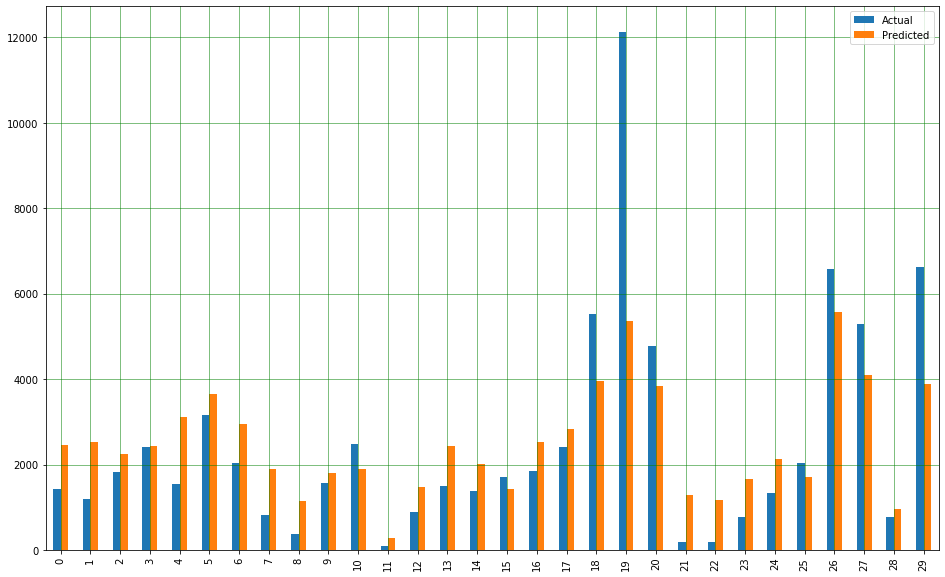

In [0]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 852.4329537092061
Mean Squared Error: 1281773.9803131619
Root Mean Squared Error: 1132.154574390424
